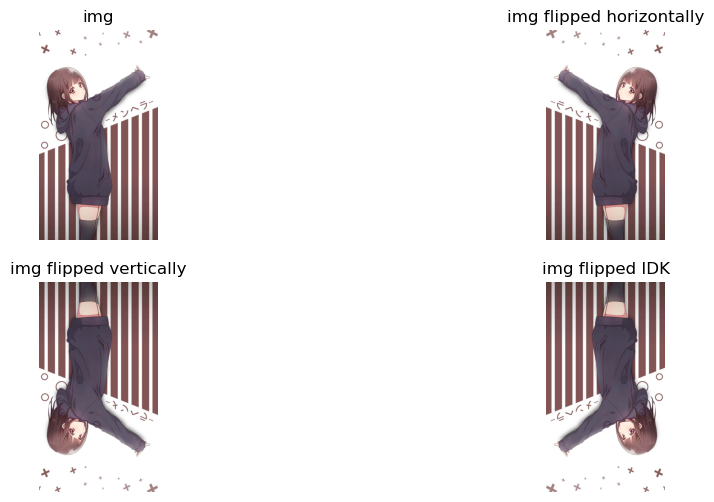

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np



def increase_brightness(img, value=0):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img








src = cv2.imread('5.jpg')
img_temp = increase_brightness(src, value=0)
img = cv2.cvtColor(img_temp,cv2.COLOR_BGR2RGB)
hor_img = cv2.flip(img, 1)
ver_img = cv2.flip(img, 0)
dir_img = cv2.flip(img, -1)


plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.title("img")
plt.imshow(img)
plt.axis("off")

plt.subplot(2,2,2)
plt.title("img flipped horizontally")
plt.imshow(hor_img)
plt.axis("off")

plt.subplot(2,2,3)
plt.title("img flipped vertically")
plt.imshow(ver_img)
plt.axis("off")

plt.subplot(2,2,4)
plt.title("img flipped IDK")
plt.imshow(dir_img)
plt.axis("off")


plt.show()

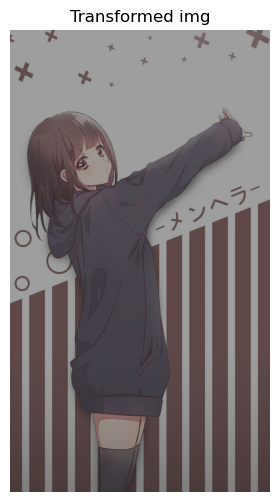

In [13]:
alpha = 0.5  
beta = 30    

transformed_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Transformed img")
plt.imshow(transformed_img)
plt.axis("off")

plt.show()

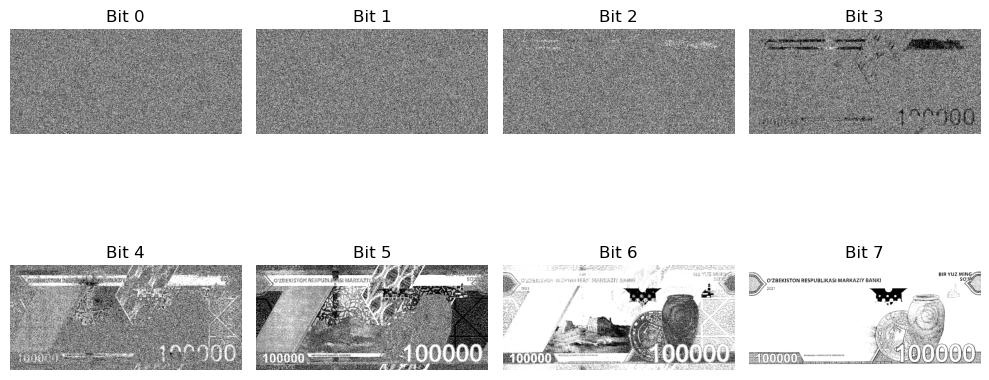

<Figure size 640x480 with 0 Axes>

In [15]:

img2 = cv2.imread('100.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,6))

for k in range(8):
    bit = ((img2 >> k) & 1) * 255

    plt.subplot(2,4,k+1)
    plt.imshow(bit, cmap='gray')
    plt.title(f"Bit {k}")
    plt.axis("off")

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

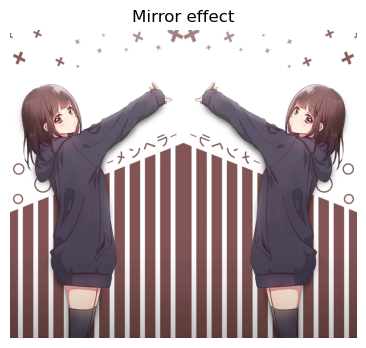

In [3]:
# Mirror effect (original + flipped)
mirror = np.concatenate((img, hor_img), axis=1)

plt.figure(figsize=(8,4))
plt.imshow(mirror)
plt.title("Mirror effect")
plt.axis("off")
plt.show()



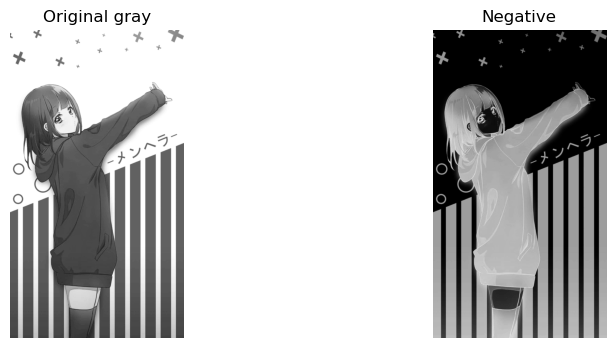

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
negative = 255 - gray

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(negative, cmap='gray')
plt.title("Negative")
plt.axis("off")

plt.show()


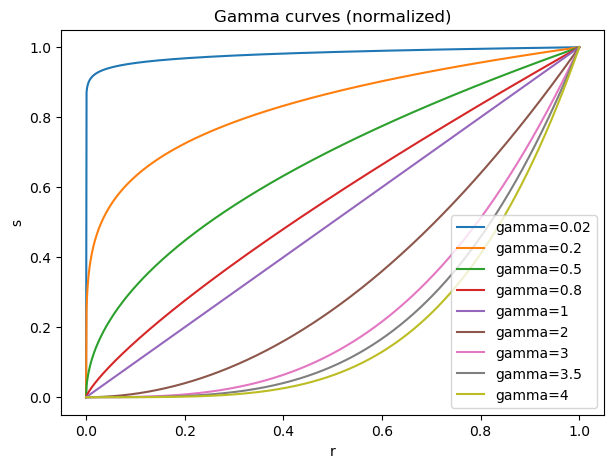

In [5]:
gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]

r = np.linspace(0,1,1000)

plt.figure(figsize=(7,5))
for g in gammas:
    s = r**g
    plt.plot(r, s, label=f"gamma={g}")

plt.title("Gamma curves (normalized)")
plt.xlabel("r")
plt.ylabel("s")
plt.legend()
plt.show()

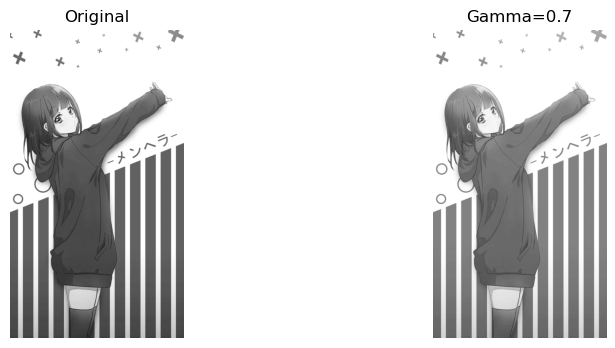

In [7]:
gamma = 0.7

# Normalize to [0,1]
gray_norm = gray / 255.0

# Apply gamma
gamma_img = np.power(gray_norm, gamma)

# Back to uint8
gamma_img = np.uint8(gamma_img * 255)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gamma_img, cmap='gray')
plt.title(f"Gamma={gamma}")
plt.axis("off")

plt.show()

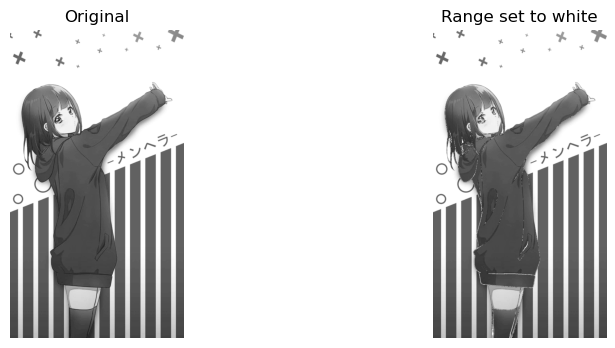

In [11]:
A = 10
B = 40

range_img = gray.copy()

mask = (range_img >= A) & (range_img <= B)
range_img[mask] = 255

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(range_img, cmap='gray')
plt.title("Range set to white")
plt.axis("off")

plt.show()